In [1]:
#code to load required libraries and data:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
%matplotlib inline 
# to show the figures in the Jupyter Notebook itself

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')


In [4]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1)

In [6]:
train_set.shape,test_set.shape

((32560, 15), (16280, 15))

In [7]:
# extracting  the column names
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.sample(4, random_state = 42) #Returns a random sample of the training set.

age   workclass  fnlwgt   education  education_num  \
14160   38     Private  680390     HS-grad              9   
27047   45   State-gov   50567     HS-grad              9   
28867   29     Private  185908   Bachelors             13   
5667    51     Private  306108   Doctorate             16   

            marital_status        occupation    relationship    race      sex  \
14160             Divorced      Adm-clerical       Unmarried   White   Female   
27047   Married-civ-spouse   Exec-managerial            Wife   White   Female   
28867   Married-civ-spouse   Exec-managerial         Husband   Black     Male   
5667         Never-married    Prof-specialty   Not-in-family   White     Male   

       capital_gain  capital_loss  hours_per_week  native_country wage_class  
14160             0             0              20   United-States      <=50K  
27047             0             0              40   United-States      <=50K  
28867             0             0              55   United-States       >50K  
5667              0             0              40   United-States       >50K

In [9]:
test_set.sample(4, random_state = 42) #Returns a random sample of the test set.

age workclass  fnlwgt      education  education_num  \
13633   39   Private   82726   Some-college             10   
1921    20   Private  223811        HS-grad              9   
12140   35   Private  111635        HS-grad              9   
9933    25   Private  121789   Some-college             10   

            marital_status      occupation    relationship    race      sex  \
13633   Married-civ-spouse           Sales            Wife   White   Female   
1921         Never-married   Other-service       Own-child   White     Male   
12140   Married-civ-spouse   Other-service         Husband   White     Male   
9933         Never-married           Sales   Not-in-family   White     Male   

       capital_gain  capital_loss  hours_per_week  native_country wage_class  
13633             0             0              40   United-States     <=50K.  
1921              0             0              23   United-States     <=50K.  
12140             0             0              40   United-States     <=50K.  
9933              0             0              38   United-States     <=50K.

In [10]:
train_set.head()

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country wage_class  
0             0             0              13   United-States      <=50K  
1             0             0              40   United-States      <=50K  
2             0             0              40   United-States      <=50K  
3             0             0              40            Cuba      <=50K  
4             0             0              40   United-States      <=50K

In [11]:
test_set.head()

age   workclass  fnlwgt      education  education_num       marital_status  \
0   38     Private   89814        HS-grad              9   Married-civ-spouse   
1   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
2   44     Private  160323   Some-college             10   Married-civ-spouse   
3   18           ?  103497   Some-college             10        Never-married   
4   34     Private  198693           10th              6        Never-married   

           occupation    relationship    race      sex  capital_gain  \
0     Farming-fishing         Husband   White     Male             0   
1     Protective-serv         Husband   White     Male             0   
2   Machine-op-inspct         Husband   Black     Male          7688   
3                   ?       Own-child   White   Female             0   
4       Other-service   Not-in-family   White     Male             0   

   capital_loss  hours_per_week  native_country wage_class  
0             0              50   United-States     <=50K.  
1             0              40   United-States      >50K.  
2             0              40   United-States      >50K.  
3             0              30   United-States     <=50K.  
4             0              30   United-States     <=50K.

In [12]:
#Replacing inappropriate values to Nan values, it wont work with any replace method 
#after converting it as   dataframe in pandas 

#so replace while reading files,using 'na.replace'

In [13]:
# import numpy as np
# test_set=test_set.applymap(lambda x: np.nan if x == '?' else x)
# newraw= test_set.replace('[?]', np.nan, regex=True)

In [14]:
train_set.head()

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country wage_class  
0             0             0              13   United-States      <=50K  
1             0             0              40   United-States      <=50K  
2             0             0              40   United-States      <=50K  
3             0             0              40            Cuba      <=50K  
4             0             0              40   United-States      <=50K

In [15]:
test_set.head()

age   workclass  fnlwgt      education  education_num       marital_status  \
0   38     Private   89814        HS-grad              9   Married-civ-spouse   
1   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
2   44     Private  160323   Some-college             10   Married-civ-spouse   
3   18           ?  103497   Some-college             10        Never-married   
4   34     Private  198693           10th              6        Never-married   

           occupation    relationship    race      sex  capital_gain  \
0     Farming-fishing         Husband   White     Male             0   
1     Protective-serv         Husband   White     Male             0   
2   Machine-op-inspct         Husband   Black     Male          7688   
3                   ?       Own-child   White   Female             0   
4       Other-service   Not-in-family   White     Male             0   

   capital_loss  hours_per_week  native_country wage_class  
0             0              50   United-States     <=50K.  
1             0              40   United-States      >50K.  
2             0              40   United-States      >50K.  
3             0              30   United-States     <=50K.  
4             0              30   United-States     <=50K.

In [106]:
# loading training and test sets

train_set= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',na_values="?")



In [107]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1,na_values="?")



In [108]:
# extracting  the column names
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [109]:
# Replacing the '?' in the dataset with NaN
train_set = train_set.apply(lambda x : x.replace(' ?',np.nan))
test_set = test_set.apply(lambda x : x.replace(' ?',np.nan))

In [110]:
#training  data

In [111]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in train_set.columns if train_set[features].isnull().sum()>0]

In [112]:
features_with_na

['workclass', 'occupation', 'native_country']

In [113]:
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(train_set[feature].isnull().mean(), 4),  ' % missing values')

workclass 0.0564  % missing values
occupation 0.0566  % missing values
native_country 0.0179  % missing values


In [114]:
# checking the frequency of NaN in different columns in the training set
for feature in features_with_na:
     print(feature, train_set[feature].isnull().sum(),  ' sum of  missing values')

workclass 1836  sum of  missing values
occupation 1843  sum of  missing values
native_country 583  sum of  missing values


In [115]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  wage_class      32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [116]:
train_set.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [117]:
train_set.describe(include=['O'])

workclass education       marital_status       occupation relationship  \
count      30724     32560                32560            30717        32560   
unique         8        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country wage_class  
count    32560  32560           31977      32560  
unique       5      2              41          2  
top      White   Male   United-States      <=50K  
freq     27815  21789           29169      24719

In [118]:
#testing data

In [119]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in test_set.columns if test_set[features].isnull().sum()>0]

In [120]:
features_with_na

['workclass', 'occupation', 'native_country']

In [121]:
# checking the frequency of NaN in different columns in the training set
for feature in features_with_na:
     print(feature, test_set[feature].isnull().sum(),  ' sum of  missing values')

workclass 963  sum of  missing values
occupation 966  sum of  missing values
native_country 274  sum of  missing values


In [122]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       15317 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education_num   16280 non-null  int64 
 5   marital_status  16280 non-null  object
 6   occupation      15314 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital_gain    16280 non-null  int64 
 11  capital_loss    16280 non-null  int64 
 12  hours_per_week  16280 non-null  int64 
 13  native_country  16006 non-null  object
 14  wage_class      16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [123]:
train_set.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [124]:
test_set.describe(include=['O'])

workclass education       marital_status       occupation relationship  \
count      15317     16280                16280            15314        16280   
unique         8        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       11209      5283                 7403             2032         6523   

          race    sex  native_country wage_class  
count    16280  16280           16006      16280  
unique       5      2              40          2  
top      White   Male   United-States     <=50K.  
freq     13946  10859           14661      12434

In [125]:
# Dropping the NaN values from training and test sets
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [126]:
train_set.shape,test_set.shape

((30161, 15), (15059, 15))

In [127]:
#training dataset

In [128]:
# list of numerical variables for tarining set
numerical_features = [feature for feature in train_set.columns if train_set[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train_set[numerical_features].head()

Number of numerical variables:  6


age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40

In [129]:

discrete_feature=[feature for feature in numerical_features if len(train_set[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [130]:
discrete_feature

['education_num']

In [131]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [132]:
continuous_feature

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

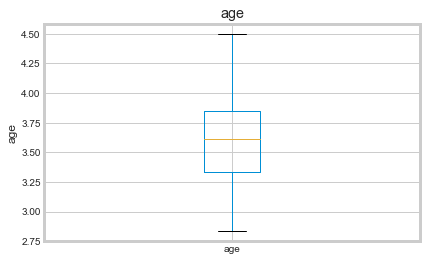

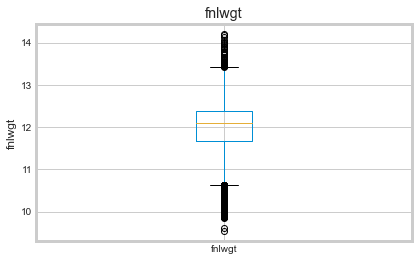

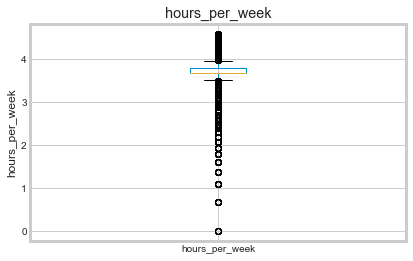

In [133]:
# to find outliers in continuous variables
for feature in continuous_feature:
    data=train_set.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [134]:
categorical_features=[feature for feature in train_set.columns if train_set[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [135]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_set[feature].unique())))

The feature is workclass and number of categories are 7
The feature is education and number of categories are 16
The feature is marital_status and number of categories are 7
The feature is occupation and number of categories are 14
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native_country and number of categories are 41
The feature is wage_class and number of categories are 2


In [136]:
#testing dataset

In [137]:
# list of numerical variables for tarining set
numerical_features = [feature for feature in test_set.columns if test_set[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
test_set[numerical_features].head()

Number of numerical variables:  6


age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   38   89814              9             0             0              50
1   28  336951             12             0             0              40
2   44  160323             10          7688             0              40
4   34  198693              6             0             0              30
6   63  104626             15          3103             0              32

In [138]:

discrete_feature=[feature for feature in numerical_features if len(test_set[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [139]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


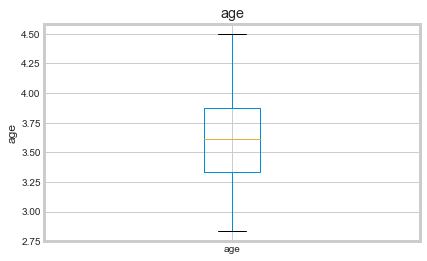

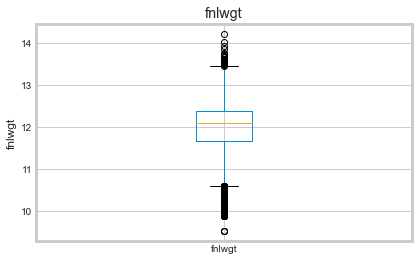

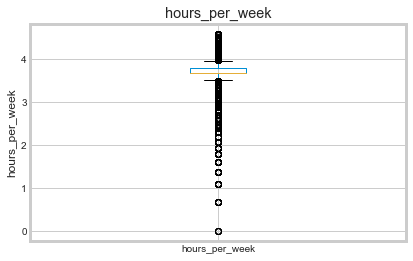

In [140]:
# to find outliers in continuous variables
for feature in continuous_feature:
    data=test_set.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [141]:
categorical_features=[feature for feature in train_set.columns if train_set[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [142]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(test_set[feature].unique())))

The feature is workclass and number of categories are 7
The feature is education and number of categories are 16
The feature is marital_status and number of categories are 7
The feature is occupation and number of categories are 14
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native_country and number of categories are 40
The feature is wage_class and number of categories are 2


In [143]:
X_train_s=train_set.copy()
X_test_s=test_set.copy()
dataset=X_train_s.append(X_test_s)

In [144]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['wage_class'],test_size=0.2,random_state=0)

In [145]:
X_train.shape,X_train_s.shape

((36176, 15), (30161, 15))

In [146]:
X_test.shape,X_test_s.shape

((9044, 15), (15059, 15))

In [147]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [148]:
categorical_features=[feature for feature in X_train.columns if X_train[feature].dtype=='O']

In [149]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [150]:
#doubt
for feature in categorical_features:
    temp=X_train.groupby(feature)['wage_class'].count()/len(X_train)
#     print(temp)
#     temp_df=temp[temp>0.01].index
#     dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [151]:
data=X_train.copy()

In [152]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['wage_class'].count().sort_values().index
#     print(labels_ordered)
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)
    dataset[feature]=dataset[feature].map(labels_ordered)

{' Without-pay': 0, ' Federal-gov': 1, ' Self-emp-inc': 2, ' State-gov': 3, ' Local-gov': 4, ' Self-emp-not-inc': 5, ' Private': 6}
{' Preschool': 0, ' 1st-4th': 1, ' 5th-6th': 2, ' Doctorate': 3, ' 12th': 4, ' 9th': 5, ' Prof-school': 6, ' 7th-8th': 7, ' 10th': 8, ' Assoc-acdm': 9, ' 11th': 10, ' Assoc-voc': 11, ' Masters': 12, ' Bachelors': 13, ' Some-college': 14, ' HS-grad': 15}
{' Married-AF-spouse': 0, ' Married-spouse-absent': 1, ' Widowed': 2, ' Separated': 3, ' Divorced': 4, ' Never-married': 5, ' Married-civ-spouse': 6}
{' Armed-Forces': 0, ' Priv-house-serv': 1, ' Protective-serv': 2, ' Tech-support': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Transport-moving': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Sales': 9, ' Adm-clerical': 10, ' Exec-managerial': 11, ' Prof-specialty': 12, ' Craft-repair': 13}
{' Other-relative': 0, ' Wife': 1, ' Unmarried': 2, ' Own-child': 3, ' Not-in-family': 4, ' Husband': 5}
{' Other': 0, ' Amer-Indian-Eskimo': 1, ' Asian-Pac-

In [153]:
X_train['wage_class'].unique()

array([' <=50K', ' >50K', ' >50K.', ' <=50K.'], dtype=object)

In [154]:
X_train.wage_class.replace([' >50K.', ' <=50K.'], [" >50K"," <=50K"], inplace=True)

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
X_train['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [156]:
for feature in categorical_features:
    labels_ordered=X_train.groupby([feature])['wage_class'].count().sort_values().index
#     print(labels_ordered)
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)
    X_train[feature]=X_train[feature].map(labels_ordered)

{' Without-pay': 0, ' Federal-gov': 1, ' Self-emp-inc': 2, ' State-gov': 3, ' Local-gov': 4, ' Self-emp-not-inc': 5, ' Private': 6}
{' Preschool': 0, ' 1st-4th': 1, ' 5th-6th': 2, ' Doctorate': 3, ' 12th': 4, ' 9th': 5, ' Prof-school': 6, ' 7th-8th': 7, ' 10th': 8, ' Assoc-acdm': 9, ' 11th': 10, ' Assoc-voc': 11, ' Masters': 12, ' Bachelors': 13, ' Some-college': 14, ' HS-grad': 15}
{' Married-AF-spouse': 0, ' Married-spouse-absent': 1, ' Widowed': 2, ' Separated': 3, ' Divorced': 4, ' Never-married': 5, ' Married-civ-spouse': 6}
{' Armed-Forces': 0, ' Priv-house-serv': 1, ' Protective-serv': 2, ' Tech-support': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Transport-moving': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Sales': 9, ' Adm-clerical': 10, ' Exec-managerial': 11, ' Prof-specialty': 12, ' Craft-repair': 13}
{' Other-relative': 0, ' Wife': 1, ' Unmarried': 2, ' Own-child': 3, ' Not-in-family': 4, ' Husband': 5}
{' Other': 0, ' Amer-Indian-Eskimo': 1, ' Asian-Pac-

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
X_train

age  workclass  fnlwgt  education  education_num  marital_status  \
9766    39          6  230467         13             13               5   
22517   54          2  119570          9             12               6   
11187   50          6  135643         15              9               6   
21274   23          6  167424         14             10               5   
5817    51          6  194097         14             10               6   
...    ...        ...     ...        ...            ...             ...   
263     27          6  116372         12             14               5   
22924   51          6  233149          9             12               6   
13445   37          6  454024         15              9               6   
14480   37          6  123104          3             16               6   
2976    61          6  716416         14             10               6   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
9766            9             3     4    1             0          1092   
22517           9             5     4    1             0             0   
11187           7             0     2    0             0             0   
21274           8             3     4    0             0             0   
5817           11             1     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
263            11             4     4    0             0             0   
22924          11             5     4    1             0             0   
13445           8             0     3    0             0             0   
14480          12             5     4    1             0             0   
2976            9             5     4    1             0             0   

       hours_per_week  native_country  wage_class  
9766               40              36           1  
22517              50              39           0  
11187              40              30           1  
21274              35              39           1  
5817               30              39           0  
...               ...             ...         ...  
263                40              39           1  
22924              45              39           0  
13445              35              39           1  
14480              40              39           1  
2976               44              39           0  

[36176 rows x 15 columns]

In [158]:
X_train.wage_class.unique()

array([1, 0], dtype=int64)

In [159]:
X_train.shape

(36176, 15)

In [160]:
X_test.wage_class.replace([' >50K.', ' <=50K.'], [" >50K"," <=50K"], inplace=True)

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
for feature in categorical_features:
    labels_ordered=X_test.groupby([feature])['wage_class'].count().sort_values().index
#     print(labels_ordered)
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)
    X_test[feature]=X_test[feature].map(labels_ordered)

{' Without-pay': 0, ' Federal-gov': 1, ' State-gov': 2, ' Self-emp-inc': 3, ' Local-gov': 4, ' Self-emp-not-inc': 5, ' Private': 6}
{' Preschool': 0, ' 1st-4th': 1, ' 5th-6th': 2, ' Doctorate': 3, ' 12th': 4, ' Prof-school': 5, ' 9th': 6, ' 7th-8th': 7, ' 10th': 8, ' Assoc-acdm': 9, ' 11th': 10, ' Assoc-voc': 11, ' Masters': 12, ' Bachelors': 13, ' Some-college': 14, ' HS-grad': 15}
{' Married-AF-spouse': 0, ' Married-spouse-absent': 1, ' Widowed': 2, ' Separated': 3, ' Divorced': 4, ' Never-married': 5, ' Married-civ-spouse': 6}
{' Armed-Forces': 0, ' Priv-house-serv': 1, ' Protective-serv': 2, ' Tech-support': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Transport-moving': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Adm-clerical': 9, ' Sales': 10, ' Craft-repair': 11, ' Exec-managerial': 12, ' Prof-specialty': 13}
{' Other-relative': 0, ' Wife': 1, ' Unmarried': 2, ' Own-child': 3, ' Not-in-family': 4, ' Husband': 5}
{' Other': 0, ' Amer-Indian-Eskimo': 1, ' Asian-Pac-

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
X_test

age  workclass  fnlwgt  education  education_num  marital_status  \
13555   41          6  413365         15              9               6   
1333    63          3  180955          2              3               6   
14176   19          6   29798          4              8               5   
20677   18          6  245199         14             10               5   
23570   53          4  236873         12             14               6   
...    ...        ...     ...        ...            ...             ...   
6099    54          6  118108         15              9               6   
29533   43          2  424094          3             16               5   
2684    31          4  323829         15              9               4   
7221    29          6  126060         15              9               6   
5907    31          6  176025         15              9               5   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
13555           6             5     3    1             0             0   
1333           10             5     4    1             0             0   
14176           5             3     1    1             0             0   
20677           8             3     4    1             0             0   
23570          12             5     3    1             0             0   
...           ...           ...   ...  ...           ...           ...   
6099           11             5     3    1             0             0   
29533          13             4     4    0             0             0   
2684            2             0     4    1             0             0   
7221           10             1     4    0             0             0   
5907            3             2     3    0             0             0   

       hours_per_week  native_country  wage_class  
13555              40              40           1  
1333               25              40           1  
14176              20              40           1  
20677              40              40           1  
23570              40              40           0  
...               ...             ...         ...  
6099               40              40           1  
29533              40              40           1  
2684               45              40           1  
7221               40              40           0  
5907               40              40           1  

[9044 rows x 15 columns]

In [163]:
X_test.shape

(9044, 15)

## Data Vizualization

In [164]:
dataset.shape

(45220, 15)

In [85]:
def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') #Use matplotlib style settings from a style specification.
    fig = plt.figure(figsize=(width,height)) #Create a new figure
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # customizing the subplots
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #print(rows)
#     iterating over the columns and then showing the data distribution in various columns
    for i, column in enumerate(dataset.columns):
        #print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        #print('after',i,cols)
        #print(column)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: # plot counts of different values if the column has a datatype object
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            #print(substrings)
            g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()


C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more det

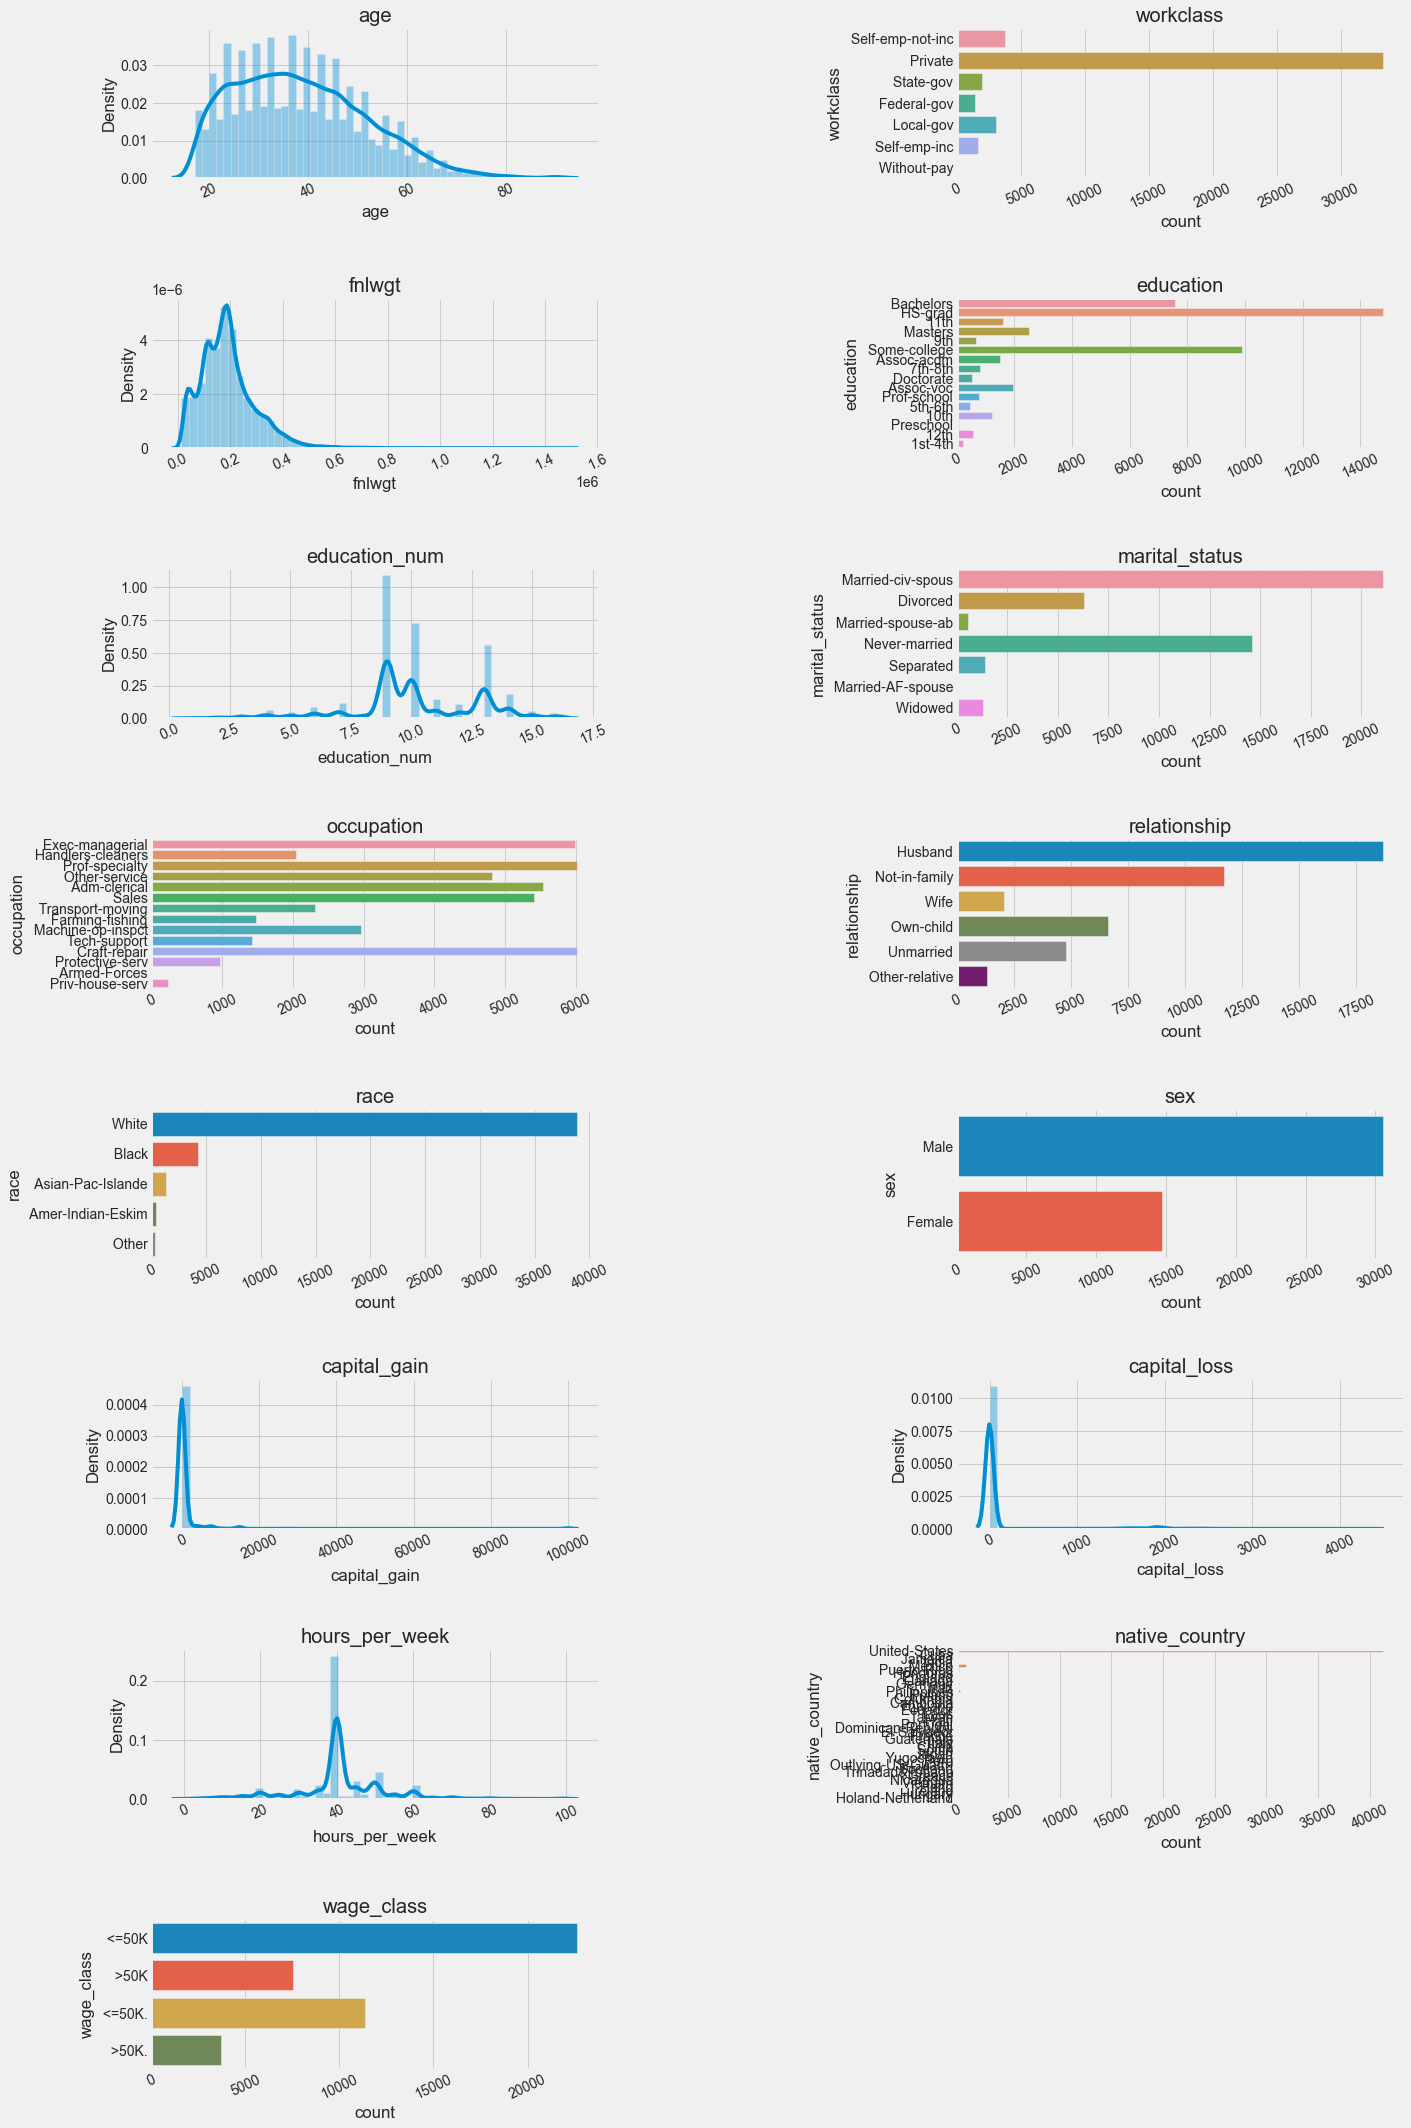

In [169]:
#  creating  columnwise histograms
plot_distribution(sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

In [87]:
dataset.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0   50          5   83311         13             13               6   
1   38          6  215646         15              9               4   
2   53          6  234721         10              7               6   
3   28          6  338409         13             13               6   
4   37          6  284582         12             14               6   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0          11             5     4    1             0             0   
1           5             4     4    1             0             0   
2           5             5     3    1             0             0   
3          12             1     3    0             0             0   
4          11             1     4    0             0             0   

   hours_per_week  native_country  wage_class  
0              13            39.0           3  
1              40            39.0           3  
2              40            39.0           3  
3              40            31.0           3  
4              40            39.0           3

In [177]:
sample=train_set.append(test_set)

In [178]:
sample.head()

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country wage_class  
0             0             0              13   United-States      <=50K  
1             0             0              40   United-States      <=50K  
2             0             0              40   United-States      <=50K  
3             0             0              40            Cuba      <=50K  
4             0             0              40   United-States      <=50K

In [167]:
sample.shape

(45220, 15)

In [179]:
sample.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [180]:
sample.wage_class

0          <=50K
1          <=50K
2          <=50K
3          <=50K
4          <=50K
          ...   
16274     <=50K.
16275     <=50K.
16277     <=50K.
16278     <=50K.
16279      >50K.
Name: wage_class, Length: 45220, dtype: object

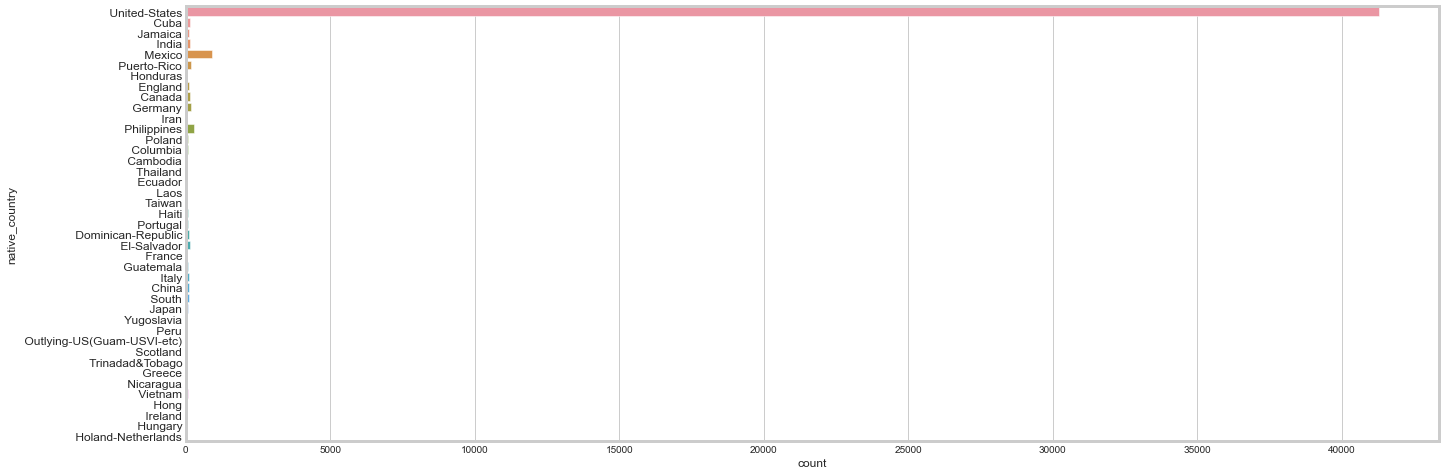

In [168]:
sns.set_style('whitegrid') #Use matplotlib style settings from a style specification.
%matplotlib inline
plt.figure(figsize=(20,8)) #Create a new figure
g = sns.countplot(y='native_country',data=sample) # plotting the counts for native country

g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) # Set the y-tick labels with list of strings labels.
plt.show()

In [181]:
sample['wage_class']=sample.wage_class.replace([' >50K.', ' <=50K.'], [" >50K"," <=50K"])

In [182]:
sample.wage_class.value_counts()

 <=50K    34012
 >50K     11208
Name: wage_class, dtype: int64

In [183]:
sample.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [184]:
sample['wage_class_s']=sample.wage_class.replace([' >50K', ' <=50K'], [1,0])

In [185]:
sample.wage_class_s.unique()

array([0, 1], dtype=int64)

In [186]:
sample.age.unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86, 89, 87], dtype=int64)

In [187]:
sample.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [188]:
sample['wage_class'].value_counts()

 <=50K    34012
 >50K     11208
Name: wage_class, dtype: int64

In [242]:
salary_gt_50 = sample[sample['wage_class_s']==1]

In [243]:
salary_gt_50.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'wage_class_s', 'sal_class', 'hours_status'],
      dtype='object')

In [191]:
salary_gt_50.native_country.unique()

array([' United-States', ' India', ' Honduras', ' Canada', ' Iran',
       ' Mexico', ' Cambodia', ' Thailand', ' Taiwan', ' Portugal',
       ' England', ' China', ' Philippines', ' Jamaica', ' Germany',
       ' Japan', ' Italy', ' Dominican-Republic', ' South', ' Cuba',
       ' Greece', ' Peru', ' Guatemala', ' El-Salvador', ' France',
       ' Vietnam', ' Poland', ' Puerto-Rico', ' Ireland', ' Yugoslavia',
       ' Columbia', ' Haiti', ' Hong', ' Ecuador', ' Nicaragua',
       ' Trinadad&Tobago', ' Hungary', ' Scotland', ' Laos',
       ' Outlying-US(Guam-USVI-etc)'], dtype=object)

In [192]:
df_gt_50=pd.DataFrame(salary_gt_50['native_country'].value_counts())

In [193]:
salary_gt_50.wage_class_s.unique()

array([1], dtype=int64)

In [194]:
salary_gt_50.shape

(11208, 16)

In [195]:
df_gt_50 = df_gt_50.reset_index()
df_gt_50.columns = ['native_country',"sal_gt_50"]

In [196]:
df_gt_50

native_country  sal_gt_50
0                 United-States      10448
1                   Philippines         84
2                         India         62
3                        Canada         60
4                       Germany         58
5                       England         47
6                        Mexico         47
7                         China         36
8                          Cuba         34
9                         Italy         33
10                        Japan         31
11                       Taiwan         25
12                         Iran         22
13                  Puerto-Rico         20
14                        South         18
15                       Greece         18
16                       France         16
17                       Poland         16
18                      Jamaica         14
19                     Portugal         12
20                  El-Salvador         11
21                      Ireland         10
22                     Cambodia          9
23                        Haiti          9
24                   Yugoslavia          8
25                         Hong          8
26                      Vietnam          7
27                      Ecuador          6
28                      Hungary          6
29                     Thailand          5
30           Dominican-Republic          5
31                         Peru          4
32                     Columbia          4
33                    Guatemala          3
34                    Nicaragua          3
35              Trinadad&Tobago          2
36                     Honduras          2
37                         Laos          2
38                     Scotland          2
39   Outlying-US(Guam-USVI-etc)          1

In [197]:
import plotly.express as px



fig = px.bar(df_gt_50, x="native_country", y="sal_gt_50")

fig.show()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = px.data.tips()
days = df.day.unique()

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": x, "value": x} for x in days],
        value=days[0],
        clearable=False,
    ),
    dcc.Graph(id="bar-chart"),
])

@app.callback(
    Output("bar-chart", "figure"), 
    [Input("dropdown", "value")])
    def update_bar_chart(day):
    mask = df["day"] == day
    fig = px.bar(df[mask], x="sex", y="total_bill", 
                 color="smoker", barmode="group")
    return fig

app.run_server(debug=True)

In [198]:
sample.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'wage_class_s'],
      dtype='object')

In [202]:
import plotly.express as px
# df = px.data.tips()
fig = px.sunburst(sample, path=['wage_class','sex', 'workclass'], values='wage_class_s', color='workclass')
fig.show()

In [203]:
sample['sal_class']=sample.wage_class.replace([' >50K', ' <=50K'], ['gt','lt'])

In [204]:
sample.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'wage_class_s', 'sal_class'],
      dtype='object')

In [205]:
sample.sal_class.unique()

array(['lt', 'gt'], dtype=object)

In [206]:
sample['sal_class'].value_counts()

lt    34012
gt    11208
Name: sal_class, dtype: int64

In [218]:
import plotly.express as px
# df = px.data.tips()
fig = px.sunburst(salary_gt_50, path=['sex', 'workclass'], values='wage_class_s',color='workclass')
fig.show()

In [219]:
import plotly.express as px
# df = px.data.tips()
fig = px.sunburst(salary_gt_50, path=['sex','education'], values=salary_gt_50['wage_class_s'], color='education')
fig.show()

In [221]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(salary_gt_50, values='wage_class_s', names='occupation')
fig.show()

In [222]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(salary_gt_50, values='wage_class_s', names='workclass')
fig.show()

In [224]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(salary_gt_50, values='wage_class_s', names='sex')
fig.show()

In [228]:

import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(salary_gt_50, values='wage_class_s', names='relationship')
fig.show()

In [226]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(salary_gt_50, values='wage_class_s', names='education')
fig.show()

In [227]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(salary_gt_50, values='wage_class_s', names='marital_status')
fig.show()

In [210]:
salary_lt_50=sample[sample['wage_class_s']==0]

In [ ]:
salary_lt_50

In [230]:
sample.hours_per_week.unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 43, 38, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5,  7, 99, 53, 39, 62, 59, 57, 78, 90, 66, 11, 49, 84, 17, 68,  3,
       27, 85, 31, 51, 77, 63, 23,  4, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69], dtype=int64)

In [231]:
sample['hours_status']=np.where(sample['hours_per_week']>=40, 'gt_hour', 'lt_hour') 

In [232]:
sample.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'wage_class_s', 'sal_class', 'hours_status'],
      dtype='object')

In [233]:
sample.hours_status.unique()

array(['lt_hour', 'gt_hour'], dtype=object)

In [234]:
sample.hours_status

0        lt_hour
1        gt_hour
2        gt_hour
3        gt_hour
4        gt_hour
          ...   
16274    gt_hour
16275    lt_hour
16277    gt_hour
16278    gt_hour
16279    gt_hour
Name: hours_status, Length: 45220, dtype: object

In [235]:
sample.head()

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country wage_class  \
0             0             0              13   United-States      <=50K   
1             0             0              40   United-States      <=50K   
2             0             0              40   United-States      <=50K   
3             0             0              40            Cuba      <=50K   
4             0             0              40   United-States      <=50K   

   wage_class_s sal_class hours_status  
0             0        lt      lt_hour  
1             0        lt      gt_hour  
2             0        lt      gt_hour  
3             0        lt      gt_hour  
4             0        lt      gt_hour

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



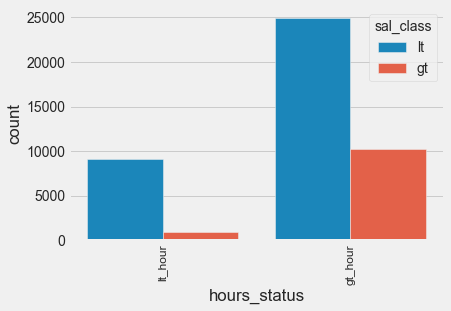

In [236]:
g = sns.countplot('hours_status',data=sample,hue='sal_class') # a countplot based on the workclass column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

In [245]:
sample['hours_status'].value_counts()

gt_hour    35133
lt_hour    10087
Name: hours_status, dtype: int64

In [248]:
ct =  pd.crosstab(sample['hours_status'], sample['wage_class'])

In [249]:
ct

wage_class     <=50K   >50K
hours_status               
gt_hour        24899  10234
lt_hour         9113    974

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



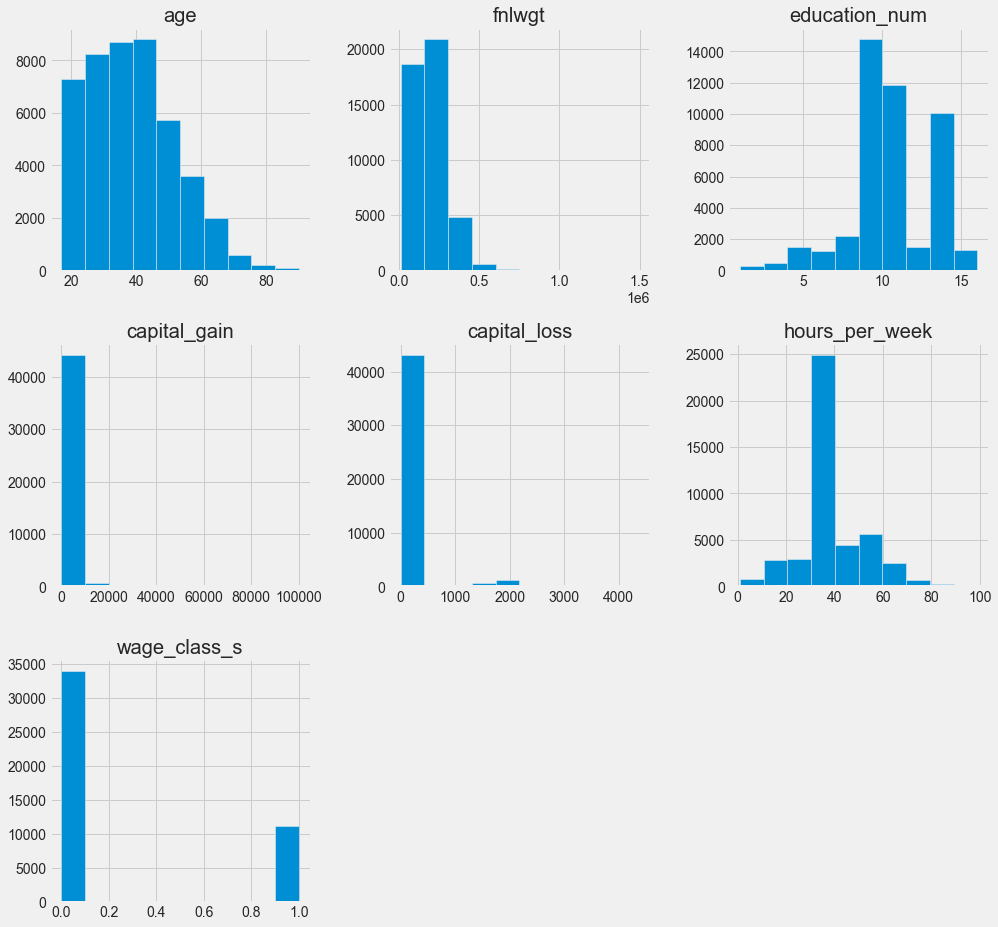

In [250]:
pd.DataFrame.hist(sample,figsize = [15,15])
plt.show()